# Test: functions_module

Should be tested against real simple results: e.g energy of Helium atom

In [1]:
%matplotlib widget 
import sys 


import numpy as np
import math 






In [2]:
%run /home/degnaiyu/Työpöytä/kanditutkielma/kandityo_koodit/main/functions_module.ipynb

2023-02-16 12:01:58.375644: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 12:01:58.504627: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-16 12:01:58.504643: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-16 12:01:59.132490: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Test: metropolisSamplingFunction -function

### Test 1: 2-particle with Gaussian probability 

In [48]:
# gaussian probability function 

@jit 
def probabilityFuncGaussian(x, params): 
    particleOnexyz = x[0] 
    particleTwoxyz = x[1]
    
    # standard deviation 
    std = 0.5

    # the peak 
    centerX = 5
    centerY = 20  
    centerZ = 10 


    return math.exp(- ((particleOnexyz[0] - centerX)**2+ (particleOnexyz[1]- centerY)**2 + (particleOnexyz[2]- centerZ)**2 + particleTwoxyz[0]**2 + particleTwoxyz[1]**2+ particleTwoxyz[2])/ (2 * std**2))






In [49]:
parametersValuesList = [0,0,0] # it does nothing, just for function to work properly 

samples = metropolisSamplingFunction(
                coordinateValueRange= (-10,10), 
                numberOfParticles=2, 
                numberOfConfig= 500, 
                probabilityFunction=probabilityFuncGaussian,
                numberOfIterations= 10000, 
                params = parametersValuesList, 
            )



firstParticleSamples = samples[0, : ]



from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

/tmp/ipykernel_27316/3513783912.py:59: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'params' of function 'probabilityFuncGaussian'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../../../tmp/ipykernel_27316/660720695.py", line 3:
<source missing, REPL/exec in use?>

  w = probabilityFunction(  trialConfiguration, params  )/probabilityFunction(currentConfig, params)
/opt/conda/lib/python3.10/site-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'params' of function 'metropolisSamplingFunction'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../../.

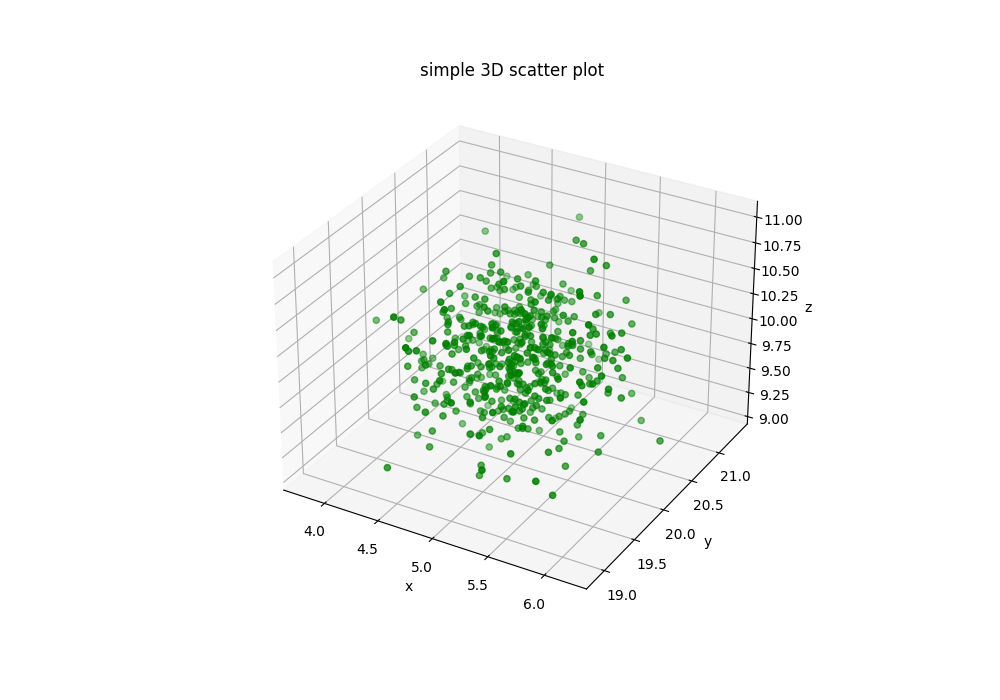

In [50]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(firstParticleSamples[:, 0],firstParticleSamples[:, 1], firstParticleSamples[:, 2], color = "green")


# setting labels 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

### Test 2: 2-particle with quadratic probability 

In [51]:

# quadratic x^2+ y^2+ z^2 
@jit 
def probabilityFuncQuadratic(x, params): 
    particleOnexyz = x[0] 
    particleTwoxyz = x[1]
    

    # the peak 
    centerX = 20
    centerY = 20  
    centerZ = 10 


    return (particleOnexyz[0] - centerX)**2+ (particleOnexyz[1]- centerY)**2 + (particleOnexyz[2]- centerZ)**2 + particleTwoxyz[0]**2 + particleTwoxyz[1]**2+ particleTwoxyz[2]



In [63]:

# quadratic x^2+ y^2+ z^2 
@jit 
def probabilityFuncQuadratic(x, params): 
    particleOnexyz = x[0] 
    particleTwoxyz = x[1]
    

    # the peak 
    centerX = 0 
    centerY = 20  
    centerZ = 10 


    return (particleOnexyz[0] + centerX)**2



In [70]:
parametersValuesList = [0,0,0] # it does nothing, just for function to work properly 

samples = metropolisSamplingFunction(
                coordinateValueRange= (-10,10), 
                numberOfParticles=2, 
                numberOfConfig= 1000, 
                probabilityFunction=probabilityFuncQuadratic,
                numberOfIterations= 60000, 
                params = parametersValuesList, 
            )

firstParticleSamples = samples[0, : ]
secondParticleSamples = samples[1, : ]


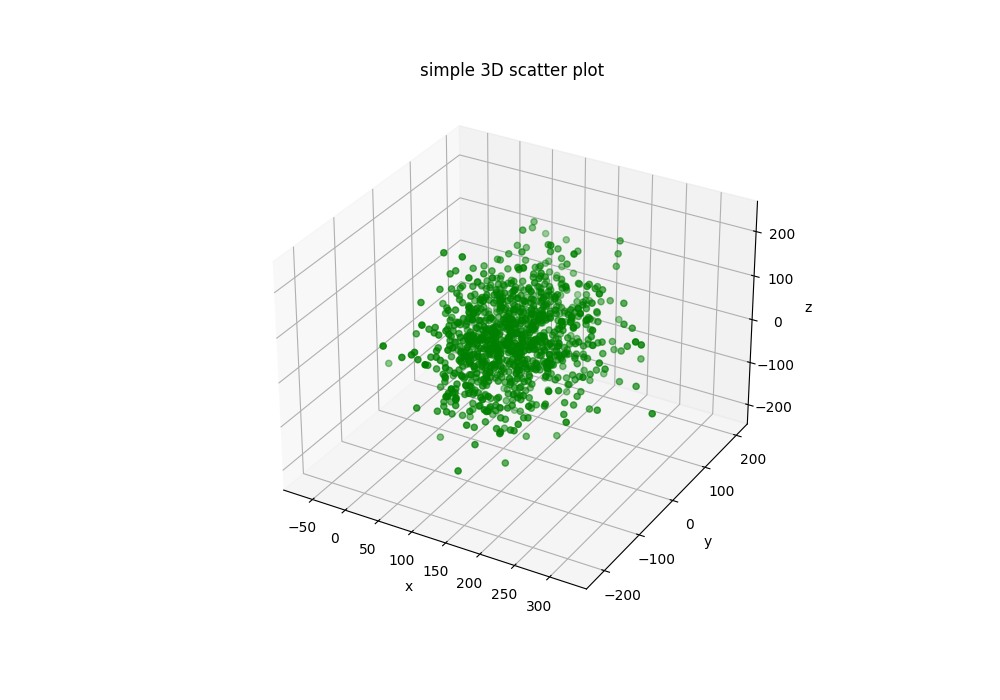

In [71]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt



# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(firstParticleSamples[:, 0],firstParticleSamples[:, 1], firstParticleSamples[:, 2], color = "green")


# setting labels 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

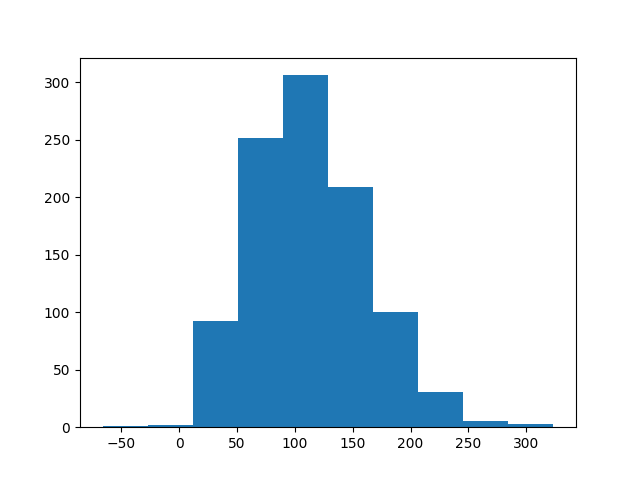

In [72]:
fig2 = plt.figure()

plt.hist(firstParticleSamples[:, 0])
plt.show()

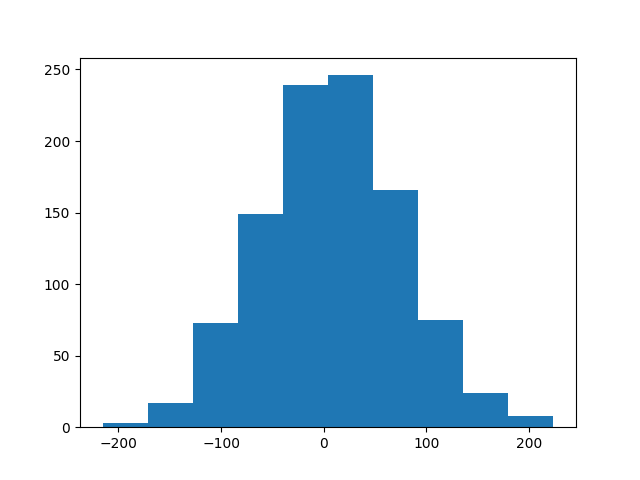

In [73]:
fig3 = plt.figure()

plt.hist(secondParticleSamples[:, 0])
plt.show()

### Test: test for linear probability function 

In [77]:

# linear y = k x
@jit 
def probabilityFuncLinear(x, params): 
    particleOnexyz = x[0] 
    particleTwoxyz = x[1]
    

    coeff = 2 


    return coeff  * particleOnexyz[0]



In [78]:
parametersValuesList = [0,0,0] # it does nothing, just for function to work properly 

samples = metropolisSamplingFunction(
                coordinateValueRange= (-10,10), 
                numberOfParticles=2, 
                numberOfConfig= 1000, 
                probabilityFunction=probabilityFuncLinear, 
                numberOfIterations= 60000, 
                params = parametersValuesList, 
            )

firstParticleSamples = samples[0, : ]
secondParticleSamples = samples[1, : ]


/tmp/ipykernel_27316/3513783912.py:59: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'params' of function 'probabilityFuncLinear'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../../../tmp/ipykernel_27316/3614785509.py", line 2:
<source missing, REPL/exec in use?>

  w = probabilityFunction(  trialConfiguration, params  )/probabilityFunction(currentConfig, params)
/opt/conda/lib/python3.10/site-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'params' of function 'metropolisSamplingFunction'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../../..